In [263]:
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
import pickle
import lz4.frame
from wremnants import plot_tools
from wremnants import boostHistHelpers as hh

In [ ]:
%load_ext autoreload
%autoreload 2

In [290]:
with lz4.frame.open("/home/k/kelong/work/WRemnants/w_z_gen_dists.pkl.lz4") as minnlof:
    minnlo = pickle.load(minnlof)
minnloh = minnlo["ZmumuPostVFP"]["output"]["nominal_gen"]*minnlo["ZmumuPostVFP"]["dataset"]["xsec"]/minnlo["ZmumuPostVFP"]["weight_sum"]
minnlopdfh = minnlo["ZmumuPostVFP"]["output"]["pdfNNPDF31"]*minnlo["ZmumuPostVFP"]["dataset"]["xsec"]/minnlo["ZmumuPostVFP"]["weight_sum"]

In [265]:
f = np.load("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/Ztests/inclusive_Z_pT.npz", allow_pickle=True)

In [291]:
minnlopdfh

Hist(
  Regular(12, 60, 120, name='massVgen', label='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'),
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  45.,  50.,  55.,
        60.,  75., 100.]), name='ptVgen', label='ptVgen'),
  Integer(0, 1, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(0, 101, underflow=False, overflow=False, name='tensor_axis_0', label='tensor_axis_0'),
  storage=Weight()) # Sum: WeightedSum(value=188894, variance=5.96335) (WeightedSum(value=199573, variance=6.28996) with flow)

In [206]:
var_axis = hist.axis.Integer(f["bins"][0][0], f["bins"][0][-1], name="vars")
mass_axis = hist.axis.Variable(f["bins"][1], name="mass")
y_axis = hist.axis.Variable(f["bins"][2], name="y")
#pt_axis = hist.axis.Variable(f["bins"][3], name="pt")
pt_axis = minnloh.axes["ptVgen"]

In [207]:
scetlibh = hist.Hist(var_axis,mass_axis,y_axis,pt_axis, storage=hist.storage.Weight())

In [208]:
scetlibh[...,:40] = np.stack((f["hist"], f["hist_err"]), axis=-1)

In [209]:
scetlibh

Hist(
  Integer(0, 101, name='vars', label='vars'),
  Variable([50, 13000], name='mass', label='mass'),
  Variable([-10, 10], name='y', label='y'),
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  45.,  50.,  55.,
        60.,  75., 100.]), name='ptVgen', label='ptVgen'),
  storage=Weight()) # Sum: WeightedSum(value=180636, variance=174.436)

In [ ]:
minnlo["ZmumuPostVFP"]["output"]["nominal_gen"].sum()

In [ ]:
x = minnlo["ZmumuPostVFP"]["output"]["nominal_gen"].sum()

In [ ]:
x.value/minnlo["ZmumuPostVFP"]["weight_sum"]

In [ ]:
fig = plot_tools.makePlotWithRatioToRef([minnloh.project("ptVgen"), scetlibh.project("ptVgen")], colors=["red", "blue"], labels=["minnlo", "scetlib"], rrange=[0.8, 1.2], binwnorm=1.)


In [ ]:
from scipy import special

In [ ]:
mid = 25
k=0.2

In [ ]:
corr = np.ones(len(pt_axis.edges)+1)
corr[1:] = 0.5*(1-special.erf(k*(pt_axis.edges-mid)))

In [ ]:
corr

In [ ]:
hep.histplot(corr)
hep.histplot(1-corr)

In [ ]:
scetlibh.shape

In [ ]:
minnlocorr[...] = minnloh.view(flow=True)*(1-corr[np.newaxis,np.newaxis,:,np.newaxis,])
scetlibcorr = scetlibh*corr[np.newaxis,np.newaxis,np.newaxis,1:-1]

In [ ]:
corrh_pt = scetlibcorr.project("ptVgen")+minnlocorr.project("ptVgen")

In [ ]:
hists = [corrh_pt] + [x .project("ptVgen") for x in [minnloh, scetlibh, minnlocorr, scetlibcorr]]
labels = [r"MiNNLO$\bigoplus$SCETlib", "MiNNLO", "SCETlib", "MiNNLO turnon", "SCETlib turnoff"]
colors = ["blue", "orange", "purple", "red", "green"]

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, labels=labels, rrange=[0.8, 1.2], binwnorm=1., rlabel="x/MiNNO+Stlib")

In [275]:
pdfPtV = minnlopdfh.project("ptVgen", "tensor_axis_0")

In [276]:
diff = hh.addHists(pdfPtV[:, 0], -1*pdfPtV)
diff

Hist(
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  45.,  50.,  55.,
        60.,  75., 100.]), name='ptVgen', label='ptVgen'),
  Integer(0, 101, underflow=False, overflow=False, name='tensor_axis_0', label='tensor_axis_0'),
  storage=Weight()) # Sum: WeightedSum(value=13.1079, variance=12.3976) (WeightedSum(value=12.9773, variance=12.5777) with flow)

In [277]:
sq = hh.multiplyHists(diff, diff)

In [278]:
ss = sq.project("ptVgen")

In [281]:
ss[...] = np.stack((np.sqrt(ss.values()), ss.variances()), axis=-1)

In [287]:
pdfUp = pdfPtV[:,0]+ss
pdfDown = pdfPtV[:,0]+-1*ss

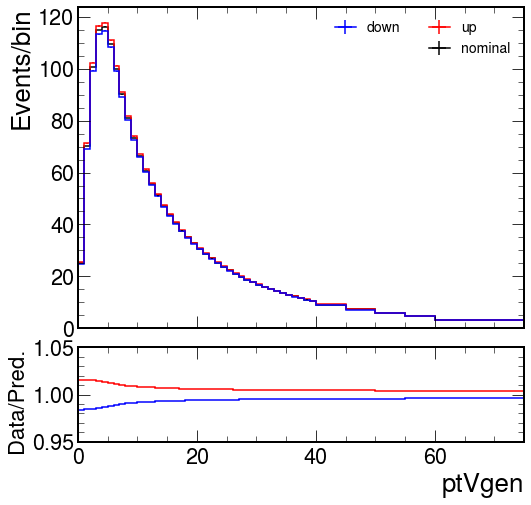

In [294]:
fig = plot_tools.makePlotWithRatioToRef([pdfPtV[:,0], pdfUp, pdfDown], colors=["black", "red", "blue"], labels=["nominal", "up", "down"], rrange=[0.95, 1.05], binwnorm=1.)

In [251]:
newh = hh.addHists(pdfPtV[:,0], -1*pdfPtV)

In [255]:
newh1 = hh.addHists(pdfPtV[:,0], -1*pdfPtV[:,1])

In [262]:
scetlibh[:,0,0,0].values()

array([30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86055553,
       30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86055553,
       30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86055553,
       30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86055553,
       30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86055553,
       30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86055553,
       30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86055553,
       30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86055553,
       30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86055553,
       30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86055553,
       30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86055553,
       30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86055553,
       30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86055553,
       30.86055553, 30.86055553, 30.86055553, 30.86055553, 30.86

/opt/venv/lib/python3.10/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fa1b1f60e50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

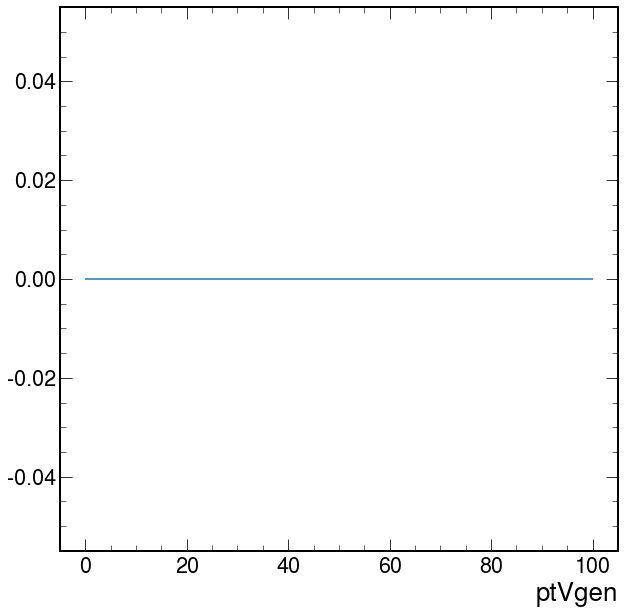

In [253]:
newh[:,1].plot()